C:\Users\singer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


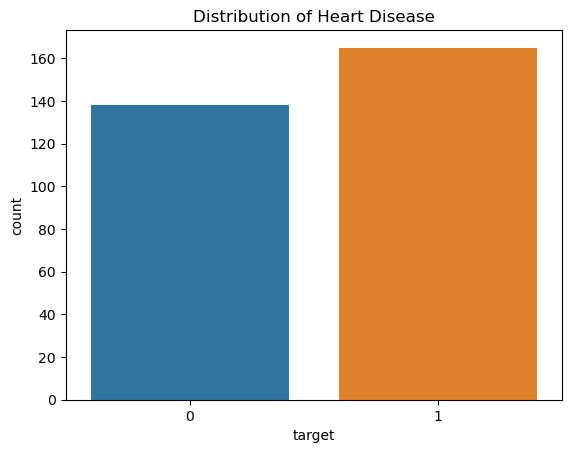

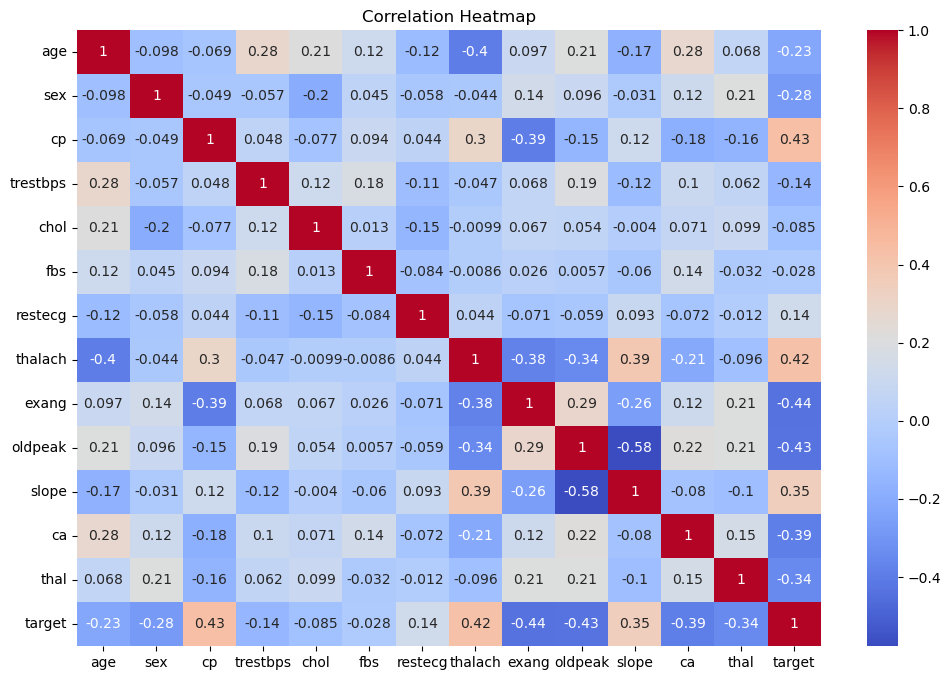

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('C:/Users/singer/Downloads/heart.csv')

# Exploratory Data Analysis
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [4]:
import numpy as np

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('target', axis=1).values
y = df['target'].values

# Splitting the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_gradient(X, y, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    error = y - predictions
    gradient = np.dot(X.T, error)
    return gradient

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)

    for _ in range(num_iterations):
        gradient = compute_gradient(X, y, weights)
        weights += learning_rate * gradient

    return weights

learning_rate = 0.01
num_iterations = 1000
weights = gradient_descent(X_train, y_train, learning_rate, num_iterations)


C:\Users\singer\AppData\Local\Temp\ipykernel_11588\3371717694.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


array([-766.81350174, -194.95594514,  385.80092584, -916.99059816,
       -188.02024129,   16.295     ,   33.84313569, 1167.82574233,
       -192.75931608, -471.39252302,  169.90987471, -339.828227  ,
       -257.21758785])

In [6]:
def predict(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return np.round(predictions)

def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

y_pred_train = predict(X_train, weights)
y_pred_test = predict(X_test, weights)

train_accuracy = accuracy(y_train, y_pred_train)
test_accuracy = accuracy(y_test, y_pred_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


Training Accuracy: 0.5679012345679012
Testing Accuracy: 0.65


C:\Users\singer\AppData\Local\Temp\ipykernel_11588\3161737793.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


C:\Users\singer\AppData\Local\Temp\ipykernel_11588\3371717694.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


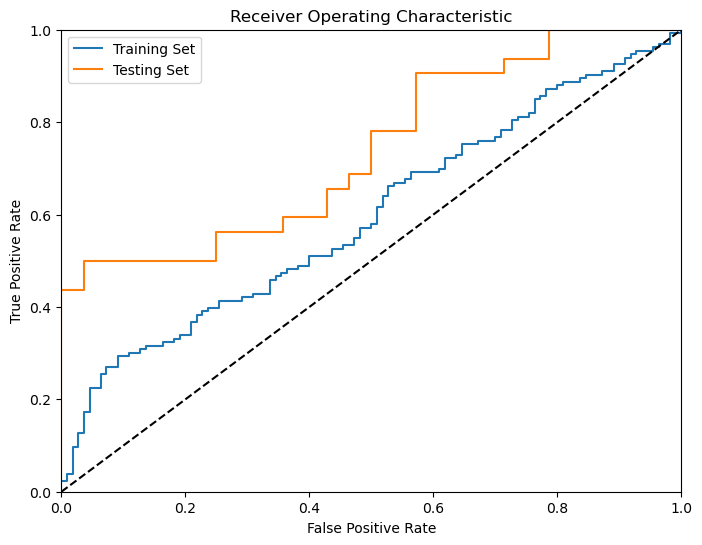

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the predicted probabilities for the positive class
y_prob_train = predict(X_train, weights)
y_prob_test = predict(X_test, weights)

# Sort the true labels and predicted probabilities in descending order of probabilities
train_indices_sorted = np.argsort(-y_prob_train)
test_indices_sorted = np.argsort(-y_prob_test)
y_train_sorted = y_train[train_indices_sorted]
y_test_sorted = y_test[test_indices_sorted]

# Calculate the true positive rate (TPR) and false positive rate (FPR) for the training set
tpr_train = np.cumsum(y_train_sorted) / np.sum(y_train_sorted)
fpr_train = np.cumsum(1 - y_train_sorted) / np.sum(1 - y_train_sorted)

# Calculate the true positive rate (TPR) and false positive rate (FPR) for the testing set
tpr_test = np.cumsum(y_test_sorted) / np.sum(y_test_sorted)
fpr_test = np.cumsum(1 - y_test_sorted) / np.sum(1 - y_test_sorted)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Training Set')
plt.plot(fpr_test, tpr_test, label='Testing Set')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
